# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import for readability of data coming back from the API retrieval
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
 
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up the static url information
base_url = "http://api.openweathermap.org/data/2.5/weather?"

temperature_unit = "Imperial"

# Initialize the lists for use in holding associated data.
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

# Initialize an integer to count the records
record_counter = 1

print(f"Beginning Data Retrieval")

# Loop through the cities and pull the requested  weather information from the openweathermap

for city in cities:
   
    query_url = base_url + "&appid=" + weather_api_key + "&q=" + city + "&units=" + temperature_unit
    response = requests.get(query_url).json()

    try:
      
      # Print out the city being worked with 
      print(f"Processing Record {record_counter} of Set 1 | {city}")  
            
      cloudiness.append(response["clouds"]["all"])
      country.append(response["sys"]["country"])
      date.append(response["dt"])
      max_temp.append(response["main"]["temp_max"])
      humidity.append(response["main"]["humidity"])
      lat.append(response["coord"]["lat"])
      lng.append(response["coord"]["lon"])
      wind_speed.append(response["wind"]["speed"])
      city_name.append(response["name"])
        
      # Increment the record counter     
      record_counter += 1
            
    except:    
      print(f"   Unable to locate City:  {city}")
      record_counter += 1
            
print(f"-----------------------------")
print(f" Data Retrieval Complete")  
print(f"-----------------------------")            

Beginning Data Retrieval
Processing Record 1 of Set 1 | loukhi
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | ust-maya
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | torbay
Processing Record 11 of Set 1 | saleaula
   Unable to locate City:  saleaula
Processing Record 12 of Set 1 | taolanaro
   Unable to locate City:  taolanaro
Processing Record 13 of Set 1 | saint-joseph
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | udala
Processing Record 16 of Set 1 | cantapoy
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | pevek
Processing Record 19 of Set 1 | illoqqortoormiut
   Unable to locate City:  illoqqortoormiut
Processing Record 20 of Set 1 | mackenzie
Processing Record 21 of Set 1 | busselton
Processing Recor

Processing Record 185 of Set 1 | brownfield
Processing Record 186 of Set 1 | ladario
Processing Record 187 of Set 1 | barrow
Processing Record 188 of Set 1 | arraial do cabo
Processing Record 189 of Set 1 | yairipok
Processing Record 190 of Set 1 | ponta do sol
Processing Record 191 of Set 1 | buraydah
Processing Record 192 of Set 1 | buariki
   Unable to locate City:  buariki
Processing Record 193 of Set 1 | saint-georges
Processing Record 194 of Set 1 | norman wells
Processing Record 195 of Set 1 | herat
Processing Record 196 of Set 1 | upernavik
Processing Record 197 of Set 1 | lavrentiya
Processing Record 198 of Set 1 | east london
Processing Record 199 of Set 1 | usinsk
Processing Record 200 of Set 1 | shimoda
Processing Record 201 of Set 1 | berberati
Processing Record 202 of Set 1 | filadelfia
Processing Record 203 of Set 1 | maumere
Processing Record 204 of Set 1 | danville
Processing Record 205 of Set 1 | banyo
Processing Record 206 of Set 1 | palmer
Processing Record 207 of S

Processing Record 369 of Set 1 | mumford
Processing Record 370 of Set 1 | gazanjyk
Processing Record 371 of Set 1 | krasnoselkup
Processing Record 372 of Set 1 | ambanja
Processing Record 373 of Set 1 | mahajanga
Processing Record 374 of Set 1 | hambantota
Processing Record 375 of Set 1 | utiroa
   Unable to locate City:  utiroa
Processing Record 376 of Set 1 | iseyin
Processing Record 377 of Set 1 | maningrida
Processing Record 378 of Set 1 | buala
Processing Record 379 of Set 1 | san jose
Processing Record 380 of Set 1 | remontnoye
Processing Record 381 of Set 1 | lakes entrance
Processing Record 382 of Set 1 | madanapalle
Processing Record 383 of Set 1 | burica
   Unable to locate City:  burica
Processing Record 384 of Set 1 | sal rei
Processing Record 385 of Set 1 | north bend
Processing Record 386 of Set 1 | igarka
Processing Record 387 of Set 1 | bauta
Processing Record 388 of Set 1 | itaperuna
Processing Record 389 of Set 1 | dudinka
Processing Record 390 of Set 1 | saskylakh
Pr

Processing Record 547 of Set 1 | daru
Processing Record 548 of Set 1 | zhuanghe
Processing Record 549 of Set 1 | kutum
Processing Record 550 of Set 1 | aban
Processing Record 551 of Set 1 | beira
Processing Record 552 of Set 1 | fillan
Processing Record 553 of Set 1 | haibowan
   Unable to locate City:  haibowan
Processing Record 554 of Set 1 | mehamn
Processing Record 555 of Set 1 | gryfino
Processing Record 556 of Set 1 | pitogo
Processing Record 557 of Set 1 | cumaribo
   Unable to locate City:  cumaribo
Processing Record 558 of Set 1 | hit
Processing Record 559 of Set 1 | banjar
Processing Record 560 of Set 1 | araguacu
Processing Record 561 of Set 1 | olafsvik
Processing Record 562 of Set 1 | jhang
Processing Record 563 of Set 1 | isangel
Processing Record 564 of Set 1 | udachnyy
Processing Record 565 of Set 1 | bolshaya murta
   Unable to locate City:  bolshaya murta
Processing Record 566 of Set 1 | praia
Processing Record 567 of Set 1 | kegayli
   Unable to locate City:  kegayli

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create dataframe to prepare the order the data will be written to the output file apicityweather.csv
api_city_weather_df = pd.DataFrame({"City": city_name,
                                    "Lat": lat,
                                    "Lng": lng,
                                    "Max Temp": max_temp,
                                    "Humidity": humidity,
                                    "Cloudiness": cloudiness,
                                    "Wind Speed": wind_speed,
                                    "Country": country,
                                    "Date": date
             })  


In [5]:
# Export the City weather data into a .csv file

api_city_weather_df.to_csv("Output/apicityweather.csv",
                  encoding="utf-8", index=False, header=True)

In [6]:
# Print the dataframe which represents the data written to the apicityweather.csv file
api_city_weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Loukhi,66.0764,33.0381,8.19,91,64,9.84,RU,1615507669
1,Rikitea,-23.1203,-134.9692,79.57,79,55,13.78,PF,1615507669
2,Vaini,-21.2000,-175.2000,84.20,65,20,6.91,TO,1615507669
3,Bethel,41.3712,-73.4140,57.20,47,1,4.61,US,1615507653
4,Dikson,73.5069,80.5464,-16.67,93,100,25.34,RU,1615507670


In [7]:
api_city_weather_df.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.623980,20.559413,53.382153,72.864769,53.295374,8.206317,1.615508e+09
std,33.036989,91.081143,28.960710,19.085497,38.025626,6.285155,8.496540e+01
min,-54.800000,-179.166700,-31.720000,7.000000,0.000000,0.200000,1.615507e+09
25%,-6.617000,-60.890550,39.200000,64.000000,17.250000,3.440000,1.615508e+09
50%,22.839750,27.953450,63.365000,76.000000,62.000000,6.690000,1.615508e+09
75%,49.496675,101.479925,75.900000,88.000000,90.000000,11.107500,1.615508e+09
max,78.218600,179.316700,93.200000,100.000000,100.000000,41.500000,1.615508e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.

#      At this time, there does not appear to be any cities having humidity > 100%
#      As per the instructions, skipping this step

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#     At this time, there does not appear to be any cities having humidity > 100%
#     As per the instructions, skipping this step


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

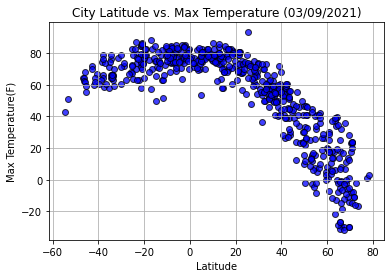

In [10]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Max Temp"], 
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.grid()
plt.title("City Latitude vs. Max Temperature (03/09/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")

plt.savefig("Images/LatitudeVSTemperature.png")
plt.show()



## Latitude vs. Humidity Plot

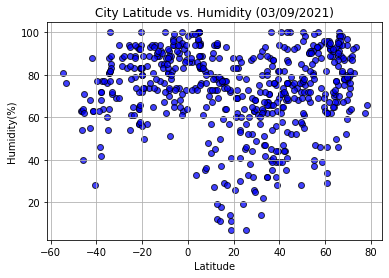

In [11]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Humidity"],
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs. Humidity (03/09/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()

plt.savefig("Images/LatitudeVSHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

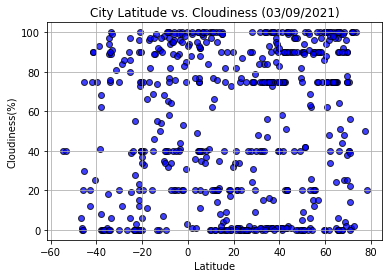

In [12]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Cloudiness"],
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs. Cloudiness (03/09/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()

plt.savefig("Images/LatitudeVSCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

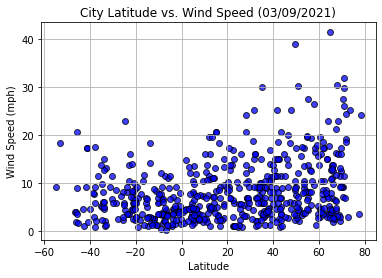

In [13]:
plt.scatter(api_city_weather_df["Lat"], api_city_weather_df["Wind Speed"],
            marker="o", facecolors="blue", edgecolors="black",alpha=0.75)

plt.title("City Latitude vs. Wind Speed (03/09/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("Images/LatitudeVSWindSpeed.png")
plt.show()

## Linear Regression

In [14]:
# Northern Hemisphere is where Longitude ranges from 0 through +90  and latitude ranges from -180 through +180
northernhemisphere = api_city_weather_df.loc[(api_city_weather_df["Lng"] >= 0) & (api_city_weather_df["Lng"] <= 90), :]

# Southern Hemisphere is where Longitude  ranges from 0 through -90  and Latitude ranges from -180 through +180
southernhemisphere = api_city_weather_df.loc[(api_city_weather_df["Lng"] >= -90) & (api_city_weather_df["Lng"] <= 0), :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.7999974067985375


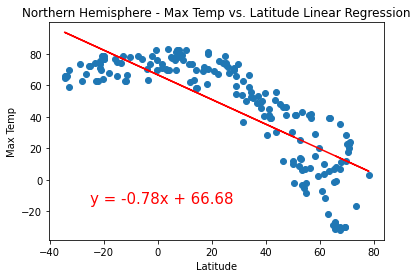

In [15]:
# Northern Hemisphere
x_values = northernhemisphere["Lat"]
y_values = northernhemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-25,-15), fontsize=15, color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.655512337685593


Text(0, 0.5, 'Max Temp')

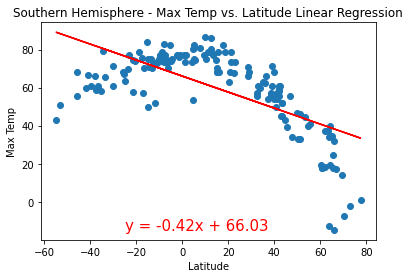

In [16]:

x_values = southernhemisphere["Lat"]
y_values = southernhemisphere["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-25,-15), fontsize=15, color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.04846129694427555


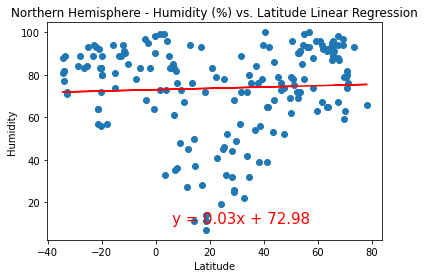

In [22]:
x_values = northernhemisphere["Lat"]
y_values = northernhemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : -0.12859102486269064


Text(0, 0.5, 'Humidity')

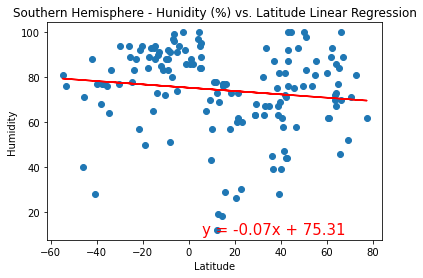

In [23]:
x_values = southernhemisphere["Lat"]
y_values = southernhemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Southern Hemisphere - Hunidity (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.11403177517748346


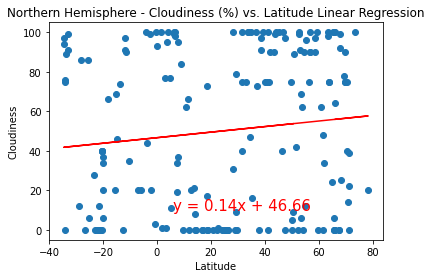

In [24]:
x_values = northernhemisphere["Lat"]
y_values = northernhemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.2016398033217379


Text(0, 0.5, 'Cloudiness')

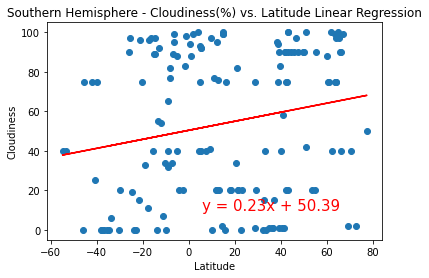

In [25]:
x_values = southernhemisphere["Lat"]
y_values = southernhemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.46704589280358316


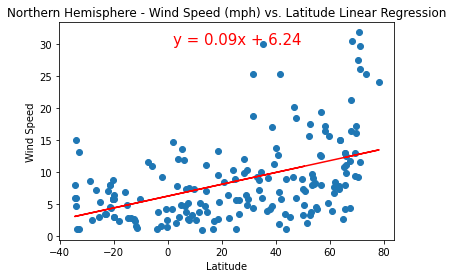

In [29]:
x_values = northernhemisphere["Lat"]
y_values = northernhemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(2,30), fontsize=15, color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.2559716128895373


Text(0, 0.5, 'Wind Speed')

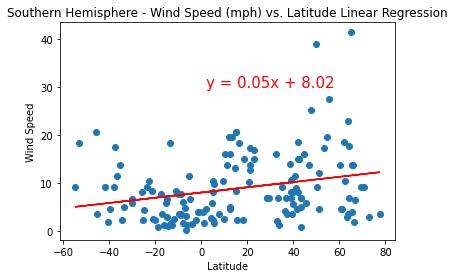

In [31]:
x_values = southernhemisphere["Lat"]
y_values = southernhemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The r-value is : {rvalue}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(2,30), fontsize=15, color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')